## Import libraries

In [58]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

## Read in data

In [2]:
cycling = pd.read_csv("../datasets/bike_rides.csv", index_col=0,
                      parse_dates=True)
cycling.index.name = ""
target_name = "power"
data, target = cycling.drop(columns=target_name), cycling[target_name]

## Explore data

In [3]:
data.head()

,heart-rate,cadence,speed,acceleration,slope
,,,,,
2020-08-18 14:43:19,102.0,64.0,4.325,0.0880,-0.033870
2020-08-18 14:43:20,103.0,64.0,4.336,0.0842,-0.033571
2020-08-18 14:43:21,105.0,66.0,4.409,0.0234,-0.033223
2020-08-18 14:43:22,106.0,66.0,4.445,0.0016,-0.032908
2020-08-18 14:43:23,106.0,67.0,4.441,0.1144,0.000000


In [4]:
data

,heart-rate,cadence,speed,acceleration,slope
,,,,,
2020-08-18 14:43:19,102.0,64.0,4.325,0.0880,-0.033870
2020-08-18 14:43:20,103.0,64.0,4.336,0.0842,-0.033571
2020-08-18 14:43:21,105.0,66.0,4.409,0.0234,-0.033223
2020-08-18 14:43:22,106.0,66.0,4.445,0.0016,-0.032908
2020-08-18 14:43:23,106.0,67.0,4.441,0.1144,0.000000
...,...,...,...,...,...
2020-09-13 14:55:57,130.0,0.0,1.054,0.0234,0.000000
2020-09-13 14:55:58,130.0,0.0,0.829,0.0258,0.000000
2020-09-13 14:55:59,129.0,0.0,0.616,-0.1686,0.000000


<AxesSubplot:ylabel='Frequency'>

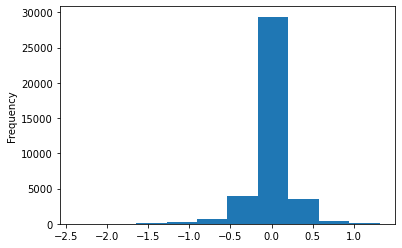

In [5]:
data['acceleration'].plot.hist()

## Create new data matrix

In [6]:
data_lin = pd.DataFrame(data['speed']**3.)
data_lin.rename(columns={'speed': 'cubedspeed'}, inplace=True)
data_lin['speed'] = data['speed']
data_lin['sinspeed'] = np.arctan(np.sin(data['slope'])) * data['speed']
data_lin['accspeed'] = (data['acceleration'] > 0) * data['acceleration'] * data['speed']

In [7]:
data_lin

,cubedspeed,speed,sinspeed,accspeed
,,,,
2020-08-18 14:43:19,80.901828,4.325,-0.146402,0.380600
2020-08-18 14:43:20,81.520685,4.336,-0.145482,0.365091
2020-08-18 14:43:21,85.707790,4.409,-0.146398,0.103171
2020-08-18 14:43:22,87.824421,4.445,-0.146198,0.007112
2020-08-18 14:43:23,87.587538,4.441,0.000000,0.508050
...,...,...,...,...
2020-09-13 14:55:57,1.170905,1.054,0.000000,0.024664
2020-09-13 14:55:58,0.569723,0.829,0.000000,0.021388
2020-09-13 14:55:59,0.233745,0.616,0.000000,-0.000000


<AxesSubplot:ylabel='Frequency'>

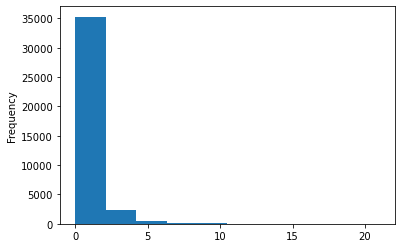

In [8]:
data_lin['accspeed'].plot.hist()

## Create linear predictive model

In [9]:
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import RidgeCV
from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(), RidgeCV())

In [10]:
model

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('ridgecv', RidgeCV(alphas=array([ 0.1,  1. , 10. ])))])

In [11]:
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import cross_validate

ss = ShuffleSplit(n_splits=4)
ret = cross_validate(model, data_lin, target, cv=ss, scoring='neg_mean_absolute_error', return_estimator=True, return_train_score=True)

In [12]:
ret

{'fit_time': array([0.01271629, 0.00987411, 0.00974298, 0.00976515]),
 'score_time': array([0.00155258, 0.00146198, 0.00144506, 0.00143385]),
 'estimator': [Pipeline(steps=[('standardscaler', StandardScaler()),
                  ('ridgecv', RidgeCV(alphas=array([ 0.1,  1. , 10. ])))]),
  Pipeline(steps=[('standardscaler', StandardScaler()),
                  ('ridgecv', RidgeCV(alphas=array([ 0.1,  1. , 10. ])))]),
  Pipeline(steps=[('standardscaler', StandardScaler()),
                  ('ridgecv', RidgeCV(alphas=array([ 0.1,  1. , 10. ])))]),
  Pipeline(steps=[('standardscaler', StandardScaler()),
                  ('ridgecv', RidgeCV(alphas=array([ 0.1,  1. , 10. ])))])],
 'test_score': array([-71.12343315, -73.97473332, -72.7848878 , -71.73446527]),
 'train_score': array([-72.62104475, -72.24991782, -72.45186868, -72.54340644])}

## Question 1

In [13]:
data_lin['sinspeed'].mean()

-0.0027260493808064284

## Question 2

In [14]:
-ret['test_score']

array([71.12343315, 73.97473332, 72.7848878 , 71.73446527])

## Question 3

In [15]:
[est['ridgecv'].coef_ for est in ret['estimator']]

[array([ 5.76606049, 32.8575836 , 80.79713084, 11.52401814]),
 array([ 5.62763951, 32.72387025, 80.52311796, 10.67494573]),
 array([ 5.11247967, 33.28860034, 80.81697383, 11.73888055]),
 array([ 5.27122402, 33.25491901, 80.65849515, 11.31883552])]

## Question 4

In [16]:
from sklearn.experimental import enable_hist_gradient_boosting
from sklearn.ensemble import HistGradientBoostingRegressor

modelGB = HistGradientBoostingRegressor(max_iter=1_000, early_stopping=True)
retGB = cross_validate(modelGB, data, target, cv=ss, scoring='neg_mean_absolute_error', return_estimator=True, return_train_score=True)

In [17]:
retGB

{'fit_time': array([1.30765104, 1.12195086, 0.6277225 , 1.1210506 ]),
 'score_time': array([0.03428817, 0.02303958, 0.01358032, 0.024683  ]),
 'estimator': [HistGradientBoostingRegressor(early_stopping=True, max_iter=1000),
  HistGradientBoostingRegressor(early_stopping=True, max_iter=1000),
  HistGradientBoostingRegressor(early_stopping=True, max_iter=1000),
  HistGradientBoostingRegressor(early_stopping=True, max_iter=1000)],
 'test_score': array([-42.1264224 , -44.08660568, -44.64962299, -43.57811848]),
 'train_score': array([-38.48743966, -40.15767676, -41.96584976, -40.26077804])}

In [18]:
-retGB['test_score']

array([42.1264224 , 44.08660568, 44.64962299, 43.57811848])

## Question 5

## Question 6

In [19]:
np.unique(data.index.date)

array([datetime.date(2020, 8, 18), datetime.date(2020, 8, 20),
       datetime.date(2020, 8, 26), datetime.date(2020, 9, 13)],
      dtype=object)

In [20]:
np.unique(data.index).shape

(38254,)

<AxesSubplot:>

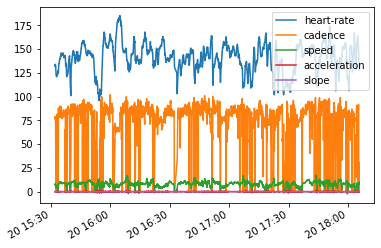

In [21]:
data[11000:20000].plot()

In [22]:
from datetime import timedelta
d = data.index[1:] - data.index[:-1] 
d[d > timedelta(seconds=1)]

TimedeltaIndex([ '0 days 00:00:12',  '0 days 00:00:17',  '0 days 00:00:14',
                 '0 days 00:00:16',  '0 days 00:00:37',  '0 days 00:00:17',
                 '0 days 00:00:16',  '0 days 00:00:04',  '0 days 00:00:51',
                 '0 days 00:01:02',  '0 days 00:00:10',  '0 days 00:00:10',
                 '0 days 00:00:09',  '0 days 00:00:14',  '0 days 00:00:06',
                 '0 days 00:00:11',  '0 days 00:00:03',  '0 days 00:00:03',
                 '0 days 00:00:03',  '0 days 00:00:04',  '0 days 00:00:12',
                 '1 days 21:39:37',  '0 days 00:00:34',  '0 days 00:00:05',
                 '0 days 00:00:11',  '0 days 00:00:16',  '0 days 00:00:05',
                 '0 days 00:00:25',  '0 days 00:00:07',  '0 days 00:01:02',
                 '0 days 00:00:02',  '0 days 00:00:50',  '0 days 00:00:15',
                 '0 days 00:00:39',  '5 days 20:49:51',  '0 days 00:00:50',
                 '0 days 00:00:07',  '0 days 00:00:08',  '0 days 00:00:04',
            

## Question 7

In [23]:
groups, _ = pd.factorize(data.index.date)
groups

array([0, 0, 0, ..., 3, 3, 3])

In [24]:
from sklearn.model_selection import LeaveOneGroupOut
cv = LeaveOneGroupOut()

In [36]:
# linear
retLOGO = cross_validate(model, data_lin, target, cv=cv, groups=groups, scoring='neg_mean_absolute_error', return_estimator=True, return_train_score=True)

In [37]:
retLOGO

{'fit_time': array([0.00970149, 0.00780177, 0.00769114, 0.00824285]),
 'score_time': array([0.00154519, 0.00149035, 0.00149345, 0.00149274]),
 'estimator': [Pipeline(steps=[('standardscaler', StandardScaler()),
                  ('ridgecv', RidgeCV(alphas=array([ 0.1,  1. , 10. ])))]),
  Pipeline(steps=[('standardscaler', StandardScaler()),
                  ('ridgecv', RidgeCV(alphas=array([ 0.1,  1. , 10. ])))]),
  Pipeline(steps=[('standardscaler', StandardScaler()),
                  ('ridgecv', RidgeCV(alphas=array([ 0.1,  1. , 10. ])))]),
  Pipeline(steps=[('standardscaler', StandardScaler()),
                  ('ridgecv', RidgeCV(alphas=array([ 0.1,  1. , 10. ])))])],
 'test_score': array([-72.41691949, -73.31725867, -81.25434658, -64.98496087]),
 'train_score': array([-72.41774009, -72.26701647, -68.96053062, -75.2901691 ])}

In [27]:
# Gradient boosting
retLOGOGB = cross_validate(modelGB, data, target, cv=cv, groups=groups, scoring='neg_mean_absolute_error', return_estimator=True, return_train_score=True)

In [28]:
retLOGOGB

{'fit_time': array([1.56429505, 1.66382766, 1.10687399, 1.05403781]),
 'score_time': array([0.07281351, 0.07249022, 0.04864645, 0.03800201]),
 'estimator': [HistGradientBoostingRegressor(early_stopping=True, max_iter=1000),
  HistGradientBoostingRegressor(early_stopping=True, max_iter=1000),
  HistGradientBoostingRegressor(early_stopping=True, max_iter=1000),
  HistGradientBoostingRegressor(early_stopping=True, max_iter=1000)],
 'test_score': array([-48.00457175, -48.27586334, -53.9709626 , -49.06072423]),
 'train_score': array([-37.24554709, -37.40265734, -37.19756102, -40.89292741])}

## Question 8

## Question 9

Train and test score standard deviations for shuffled and grouped data for RidgeCV and HistGradientBoostingRegressor:

In [29]:
ret['train_score'].std(), ret['test_score'].std()

(0.1386728010371679, 1.0840210222321474)

In [30]:
retLOGO['train_score'].std(), retLOGO['test_score'].std()

(1.8128144043836754, 4.571120144878193)

In [31]:
retGB['train_score'].std(), retGB['test_score'].std()

(1.2303746093586856, 0.9367480618144118)

In [32]:
retLOGOGB['train_score'].std(), retLOGOGB['test_score'].std()

(1.5654502531746546, 2.4231627051467064)

The standard deviations are larger for grouped data than randomly shuffled ones.

## Question 10

In [47]:
cv = LeaveOneGroupOut()
train_indices, test_indices = list(cv.split(data, target, groups=groups))[0]

In [48]:
train_indices

array([10222, 10223, 10224, ..., 38251, 38252, 38253])

In [49]:
test_indices

array([    0,     1,     2, ..., 10219, 10220, 10221])

In [50]:
data_linear_model_train = data_lin.iloc[train_indices]
data_linear_model_test = data_lin.iloc[test_indices]

data_train = data.iloc[train_indices]
data_test = data.iloc[test_indices]

target_train = target.iloc[train_indices]
target_test = target.iloc[test_indices]

In [65]:
model = make_pipeline(StandardScaler(), RidgeCV())
model.fit(data_linear_model_train, target_train)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('ridgecv', RidgeCV(alphas=array([ 0.1,  1. , 10. ])))])

In [66]:
pred = model.predict(data_linear_model_test)
pred

array([ 93.43248603,  93.76041689,  92.49688165, ..., 107.41995295,
       113.44363558, 108.3498767 ])

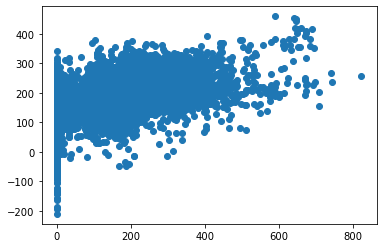

In [67]:
plt.scatter(target_test, pred)

In [69]:
modelGB = HistGradientBoostingRegressor(max_iter=1_000, early_stopping=True)
modelGB.fit(data_train, target_train)

HistGradientBoostingRegressor(early_stopping=True, max_iter=1000)

In [70]:
predGB = modelGB.predict(data_test)
predGB

array([123.58472921, 119.21194643, 131.50645628, ...,   1.03770181,
         1.03770181,   1.03770181])

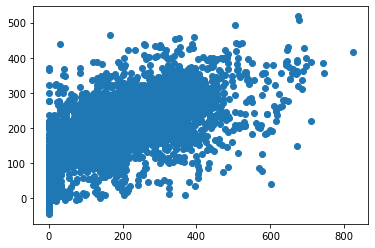

In [71]:
plt.scatter(target_test, predGB)

## Question 11

In [72]:
time_slice = slice("2020-08-18 17:00:00", "2020-08-18 17:05:00")

data_test_linear_model_subset = data_linear_model_test[time_slice]
data_test_subset = data_test[time_slice]
target_test_subset = target_test[time_slice]

In [73]:
pred2 = model.predict(data_test_linear_model_subset)
predGB2 = modelGB.predict(data_test_subset)

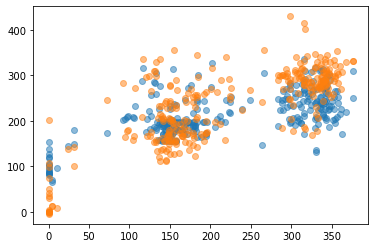

In [79]:
plt.scatter(target_test_subset, pred2, alpha=0.5)
plt.scatter(target_test_subset, predGB2, alpha=0.5)